<a href="https://colab.research.google.com/github/angievig/pythonTraining/blob/main/session26_simpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importación de librerías

import numpy as np
import matplotlib.pyplot as plt

# Keras Libraries
import keras

from keras.datasets import mnist

from keras.utils import to_categorical

from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

from keras.layers import Dense, Activation, SimpleRNN, BatchNormalization


In [ ]:
# Carga del dataset de mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Verificación del formato de las imágenes y de las etiquetas

print("x_train has the shape : {}".format(np.shape(x_train)))
print("x_test has the shape : {}".format(np.shape(x_test)))
print("y_train has the shape : {}".format(np.shape(y_train)))
print("y_test has the shape : {}".format(np.shape(y_test)))

11490434/11490434 [==============================] - 0s 0us/step
x_train has the shape : (60000, 28, 28)
x_test has the shape : (10000, 28, 28)
y_train has the shape : (60000,)
y_test has the shape : (10000,)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 13

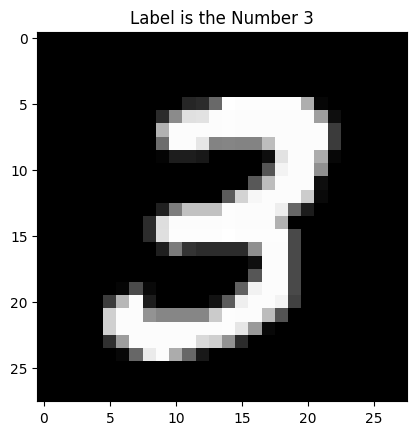

In [ ]:
# Vamos a ver la información que tenemos por cada registro

# Utilizamos como ejemplo la imagen con índice 7
idx = 7

plt.title("Label is the Number {}".format(y_train[idx]))

# Se utiliza imshow para mostrar data como imagen
# Se muestra en escala de grises

plt.imshow(x_train[idx], cmap="gray")

print(x_train[idx])

[  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
  93  82  82  56  39   0   0   0   0   0]
[0.         0.         0.         0.         0.         0.
 0.         0.19215686 0.93333333 0.99215686 0.99215686 0.99215686
 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686 0.98431373
 0.36470588 0.32156863 0.32156863 0.21960784 0.15294118 0.
 0.         0.         0.         0.        ]


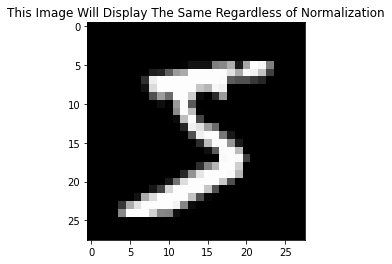

In [ ]:

print(x_train[0][7])

# Debemos normalizar el dataset para que quede en escala de 0 a 1

x_train = np.divide(x_train, 255)
x_test = np.divide(x_test, 255)

print(x_train[0][7])

# La imagen se muestra de la misma manera sin importar si está normalizada o no.

plt.title("This Image Will Display The Same Regardless of Normalization")
plt.imshow(x_train[0], cmap='gray')


In [ ]:
# Al querer entrenar redes densas y redes recurrentes, necesitamos adecuar la entrada
# Para las redes recurrentes el formato puede ser el original 28 x 28
# Para las redes densas debemos aplanchar la matriz de manera que la entrada sea un vector de 784

# Formato para las RNN
print("Old Training and Test Shape : {}".format(np.shape(x_train[0])))

# Formato para las redes neuronales densas
x_train_flat = [x.flatten() for x in x_train]
x_test_flat = [x.flatten() for x in x_test]
print("New Training and Test Shape : {}".format(np.shape(x_train_flat[0])))
x_train_flat = np.array(x_train_flat).astype('float32')
x_test_flat = np.array(x_test_flat).astype('float32')

Old Training and Test Shape : (28, 28)
New Training and Test Shape : (784,)


In [ ]:
# Debemos utilizar un conjunto de datos para la prueba y otro para la validación
# El de validación nos ayudará a identificar los mejores hiperparámetros de nuestro modelo
# El de prueba nos indicará que tan bien nuestro modelo generaliza
# Realizamos la misma operación, tanto para los datos en formato matriz como en formato vector

x_val = x_test[0:5000]
x_val_flat = x_test_flat[0:5000]
x_test = x_test[5000:10000]
x_test_flat = x_test_flat[5000:10000]

y_val = y_test[0:5000]
y_test = y_test[5000:10000]


In [ ]:
# El formato de las etiquetas originales en el dataset es discreto
# Lo vamos a convertir en un vector de 10 posiciones

print("Original Training and Test Labels : {}".format(y_train[0]))

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

# One hot encoding para las etiquetas

print("New One-Hot-Encoded Training and Test Labels : {}".format(y_train[0]))

Original Training and Test Labels : 5
New One-Hot-Encoded Training and Test Labels : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Primer modelo - red neuronal densa

model_1 = models.Sequential()

# Una red neuronal con una sola capa
# La salida debe pasar por una función de activación softwax ya que nuestra tarea es de clasificación no binaria
# Al manejar información con una red neuronal densa, el tamaño de entrada es 784

model_1.add(Dense(10, input_dim=784, activation='softmax'))

# Optimizadores que podemos utilizar
#
#   -  Adadelta    : Adadelta optimizer.
#   -  Adagrad     : Adagrad optimizer.
#   -  Adam        : Adam optimizer.
#   -  Adamax      : Adamax optimizer from Adam paper's Section 7.
#   -  Nadam       : Nesterov Adam optimizer.
#   -  Optimizer   : Abstract optimizer base class.
#   -  RMSprop     : RMSProp optimizer.
#   -  SGD         : Stochastic gradient descent optimizer.

model_1_opt = optimizers.SGD()

# Posibles medidas para nuestra función de pérdida
# Se deben utilizar de acuerdo al caso que se esté tratando
#
#   -  KLD(...)
#   -  MAE(...)
#   -  MAPE(...)
#   -  MSE(...)
#   -  MSLE(...)
#   -  binary_crossentropy(...)
#   -  categorical_crossentropy(...)
#   -  categorical_hinge(...)
#   -  cosine(...)
#   -  cosine_proximity(...)
#   -  deserialize(...)
#   -  get(...)
#   -  hinge(...)
#   -  kld(...)
#   -  kullback_leibler_divergence(...)
#   -  logcosh(...): Logarithm of the hyperbolic cosine of the prediction error.
#   -  mae(...)
#   -  mape(...)
#   -  mean_absolute_error(...)
#   -  mean_absolute_percentage_error(...)
#   -  mean_squared_error(...)
#   -  mean_squared_logarithmic_error(...)
#   -  mse(...)
#   -  msle(...)
#   -  poisson(...)
#   -  RMSprop(...)
#   -  serialize(...)
#   -  sparse_categorical_crossentropy(...)
#   -  squared_hinge(...)

model_1_loss = losses.categorical_crossentropy

# Posibles métricas con las cuales vamos a medir nuestro modelo
# Se deben utilizar de acuerdo al caso que se esté tratando
#
#   -  binary_accuracy
#   -  categorical_accuracy
#   -  sparse_categorical_accuracy
#   -  top_k_categorical_accuracy
#   -  sparse_top_k_categorical_accuracy
#   -  In addition to the metrics above, you may use any of the loss functions described in the loss function page as metrics
#   -  Custom metrics are also available

# En este caso al estar tratando con una tarea de clasificación usamos categorical accuracy
model_1_metrics = [metrics.categorical_accuracy]

# Compilamos el modelo
# Es decir, establecemos la estructura de nuestra red neuronal
model_1.compile(optimizer=model_1_opt,
              loss=model_1_loss,
              metrics=model_1_metrics)

In [ ]:
# Imprimimos la estructura de nuestra red
print(model_1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


(60000, 784)

In [ ]:
# Al ser una red densa utilizamos nuestro x_train_flat para entrenar
# Utilizamos nuestro x_val_flat para validar

history_1 = model_1.fit(x_train_flat,
                y_train,
                validation_data = (x_val_flat, y_val),
                batch_size=128,
                epochs=40)

Epoch 1/40
469/469 [==============================] - 4s 6ms/step - loss: 1.2478 - categorical_accuracy: 0.7092 - val_loss: 0.9137 - val_categorical_accuracy: 0.7958
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 0.7097 - categorical_accuracy: 0.8415 - val_loss: 0.7108 - val_categorical_accuracy: 0.8318
Epoch 3/40
469/469 [==============================] - 3s 7ms/step - loss: 0.5833 - categorical_accuracy: 0.8609 - val_loss: 0.6285 - val_categorical_accuracy: 0.8402
Epoch 4/40
469/469 [==============================] - 4s 8ms/step - loss: 0.5224 - categorical_accuracy: 0.8698 - val_loss: 0.5805 - val_categorical_accuracy: 0.8464
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.4853 - categorical_accuracy: 0.8761 - val_loss: 0.5487 - val_categorical_accuracy: 0.8546
Epoch 6/40
469/469 [==============================] - 3s 7ms/step - loss: 0.4598 - categorical_accuracy: 0.8803 - val_loss: 0.5261 - val_categorical_accuracy: 0.8584
Epoc

In [ ]:
# Método para dibujar las curvas para el entrenamiento y la validación

def plot_model_curves(history,model_name):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title(model_name+' Categorical Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch #')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(model_name+' Categorical Cross Entropy (Loss)')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.ylabel('Loss')
    plt.xlabel('Epoch #')


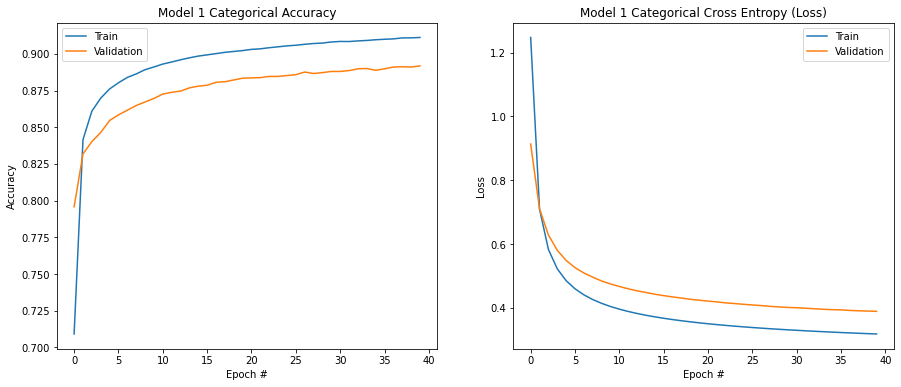

In [ ]:
plot_model_curves(history_1,'Model 1')

In [ ]:
# Ahora revisamos el accuracy con el conjunto de datos de prueba

score = model_1.evaluate(x_test_flat, y_test, batch_size=128)
print("\n----------------------------------------------\n\nAccuracy On Test Data is : {}".format(score[1]))
print("Loss On Test Data is : {}".format(score[0]))

40/40 [==============================] - 0s 3ms/step - loss: 0.2228 - categorical_accuracy: 0.9394

----------------------------------------------

Accuracy On Test Data is : 0.9394000172615051
Loss On Test Data is : 0.22282202541828156


In [ ]:
# Método para dividir los distintos tipos de predicciones teniendo en cuenta sus errores

def prediction_sets(model):
    test_predictions = model.predict(x_test_flat)
    test_result = np.absolute(y_test-test_predictions)
    test_result = [np.round(np.sum(result)) for result in test_result]
    really_wrong_list = []
    wrong_list = []
    right_but_barely_list = []
    correct_list = []
    for i in range(len(test_result)):
        if (test_result[i] == 2.0) and (np.argmax(test_predictions[i]) != np.argmax(y_test[i])):
            really_wrong_list.append(i)
        elif (test_result[i] == 1.0) and (np.argmax(test_predictions[i]) != np.argmax(y_test[i])):
            wrong_list.append(i)
        elif (test_result[i] > 0) and (np.argmax(test_predictions[i]) == np.argmax(y_test[i])):
            right_but_barely_list.append(i)
        else:
            correct_list.append(i)
    return really_wrong_list, wrong_list, right_but_barely_list, correct_list

# Método para visualizar las predicciones

def visualize(set):
    plt.figure(figsize=(16,32))
    for i, ex in enumerate(set):
        plt.subplot(3,3,(i+1))
        plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_1.predict(np.expand_dims(x_test_flat[ex],axis=0))), np.argmax(y_test[ex])))
        plt.imshow(np.reshape(x_test[ex],(28,28)), cmap="gray")
        if i>7:
            break


In [ ]:
really_wrong_list, wrong_list, right_but_barely_list, correct_list = prediction_sets(model_1)

157/157 [==============================] - 1s 2ms/step


1/1 [==============================] - 0s 38ms/step


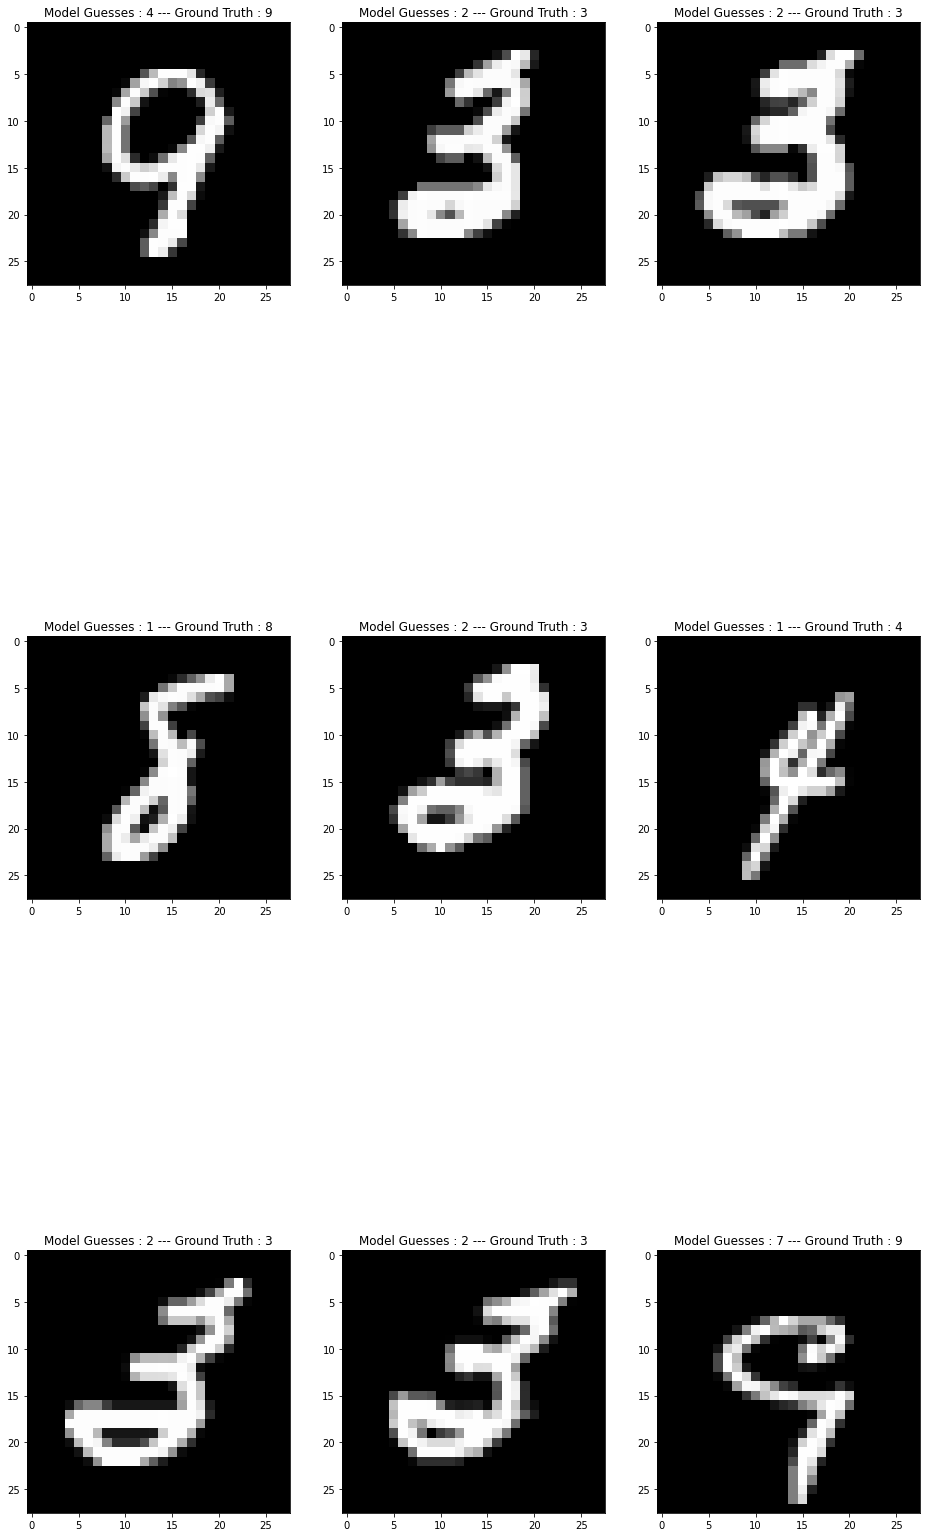

In [ ]:
visualize(really_wrong_list)


1/1 [==============================] - 0s 28ms/step


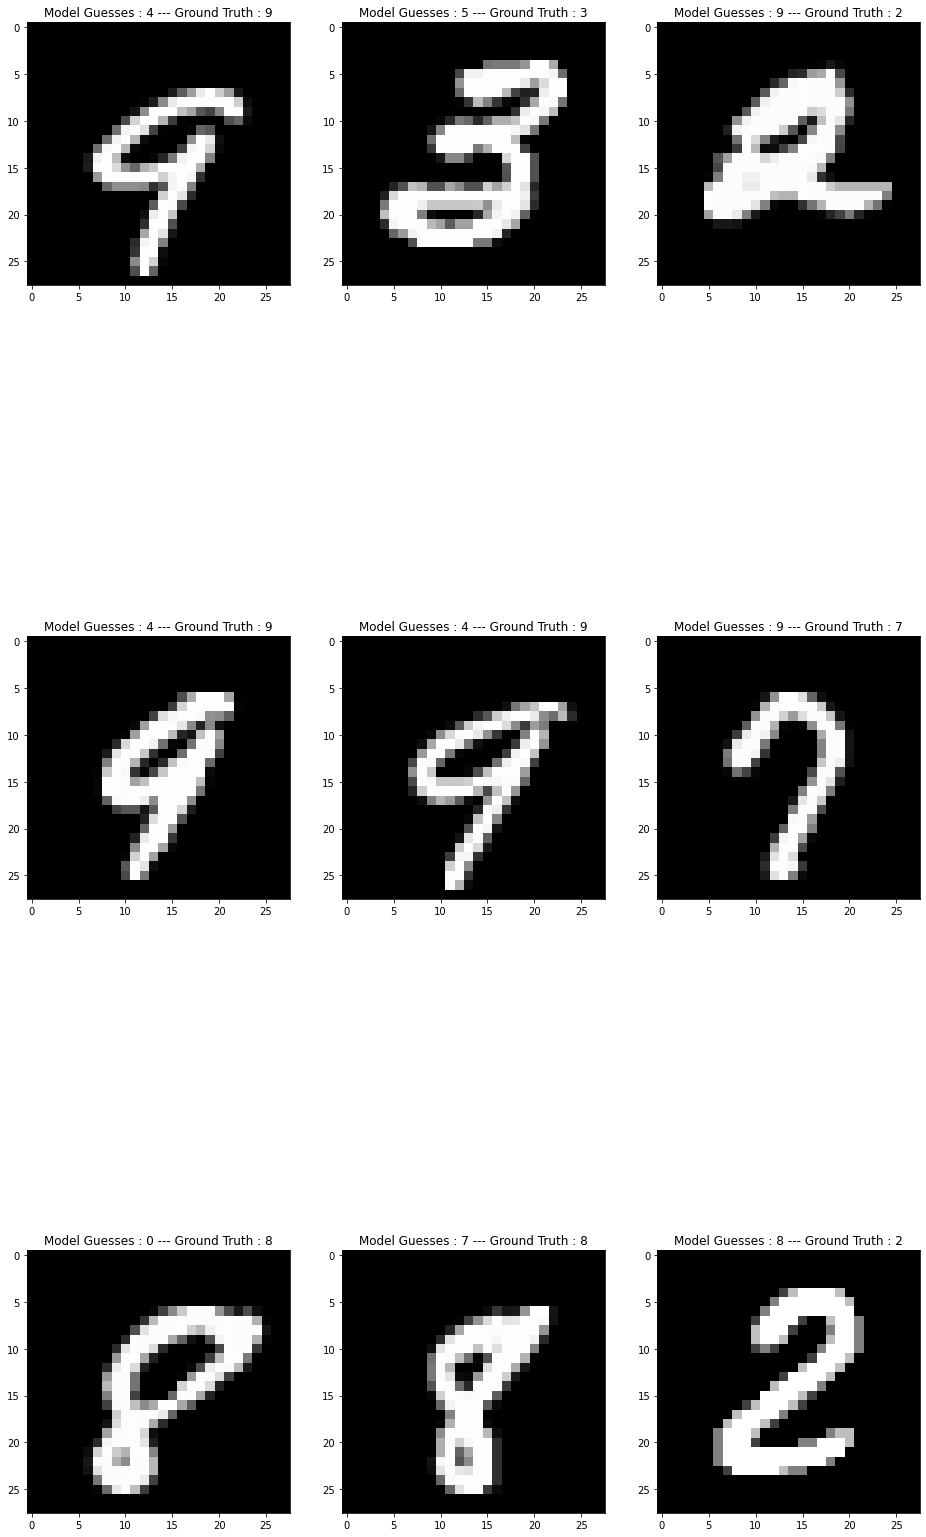

In [ ]:
visualize(wrong_list)

1/1 [==============================] - 0s 32ms/step


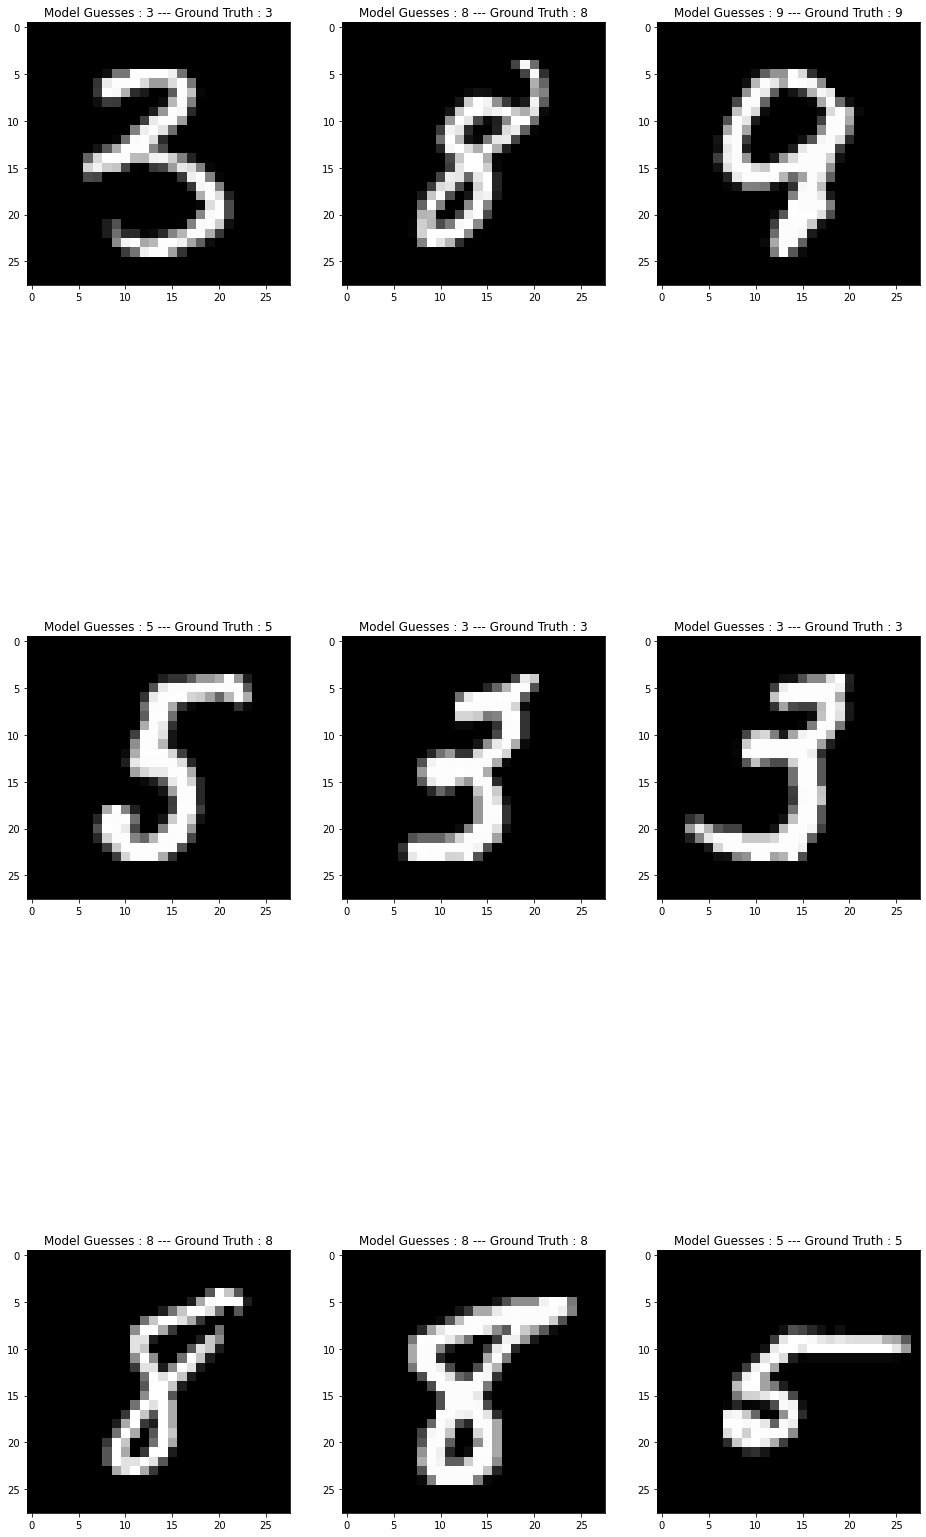

In [ ]:
visualize(right_but_barely_list)

In [ ]:
# Second model - Dense Neural NEtwork

# A dense model with 3 layers
model_2 = models.Sequential()

model_2.add(Dense(200, input_dim=784, activation='relu', kernel_initializer='truncated_normal', bias_initializer='zeros'))
model_2.add(Dense(100, activation='relu', kernel_initializer='truncated_normal', bias_initializer='zeros'))
model_2.add(Dense(10, activation='softmax'))

model_2_opt = optimizers.SGD()
model_2_loss = losses.categorical_crossentropy
model_2_metrics = [metrics.categorical_accuracy]

model_2.compile(optimizer=model_2_opt,
              loss=model_2_loss,
              metrics=model_2_metrics)


In [ ]:
print(model_2.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 200)               157000    
                                                                 
 dense_12 (Dense)            (None, 100)               20100     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_2 = model_2.fit(x_train_flat,
                y_train,
                validation_data = (x_val_flat, y_val),
                batch_size=128,
                epochs=40)

Epoch 1/40
469/469 [==============================] - 5s 7ms/step - loss: 1.4718 - categorical_accuracy: 0.6727 - val_loss: 0.8472 - val_categorical_accuracy: 0.7902
Epoch 2/40
469/469 [==============================] - 3s 7ms/step - loss: 0.5867 - categorical_accuracy: 0.8505 - val_loss: 0.5587 - val_categorical_accuracy: 0.8462
Epoch 3/40
469/469 [==============================] - 3s 7ms/step - loss: 0.4341 - categorical_accuracy: 0.8807 - val_loss: 0.4714 - val_categorical_accuracy: 0.8660
Epoch 4/40
469/469 [==============================] - 4s 7ms/step - loss: 0.3745 - categorical_accuracy: 0.8947 - val_loss: 0.4286 - val_categorical_accuracy: 0.8782
Epoch 5/40
469/469 [==============================] - 4s 8ms/step - loss: 0.3403 - categorical_accuracy: 0.9034 - val_loss: 0.3964 - val_categorical_accuracy: 0.8856
Epoch 6/40
469/469 [==============================] - 4s 8ms/step - loss: 0.3163 - categorical_accuracy: 0.9102 - val_loss: 0.3760 - val_categorical_accuracy: 0.8900
Epoc

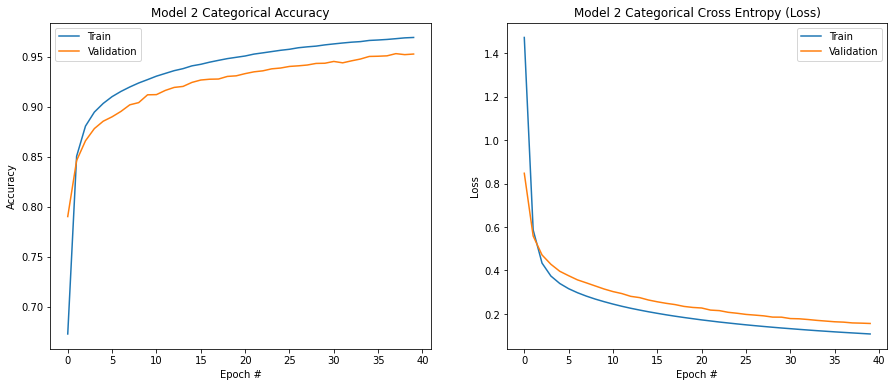

In [ ]:
plot_model_curves(history_2,'Model 2')

In [ ]:
score = model_2.evaluate(x_test_flat, y_test, batch_size=128)
print("\n----------------------------------------------\n\nAccuracy On Test Data is : {}".format(score[1]))
print("Loss On Test Data is : {}".format(score[0]))

40/40 [==============================] - 0s 6ms/step - loss: 0.0794 - categorical_accuracy: 0.9768

----------------------------------------------

Accuracy On Test Data is : 0.9768000245094299
Loss On Test Data is : 0.07940824329853058


In [ ]:
really_wrong_list, wrong_list, right_but_barely_list, correct_list = prediction_sets(model_2)

157/157 [==============================] - 1s 7ms/step


1/1 [==============================] - 0s 25ms/step


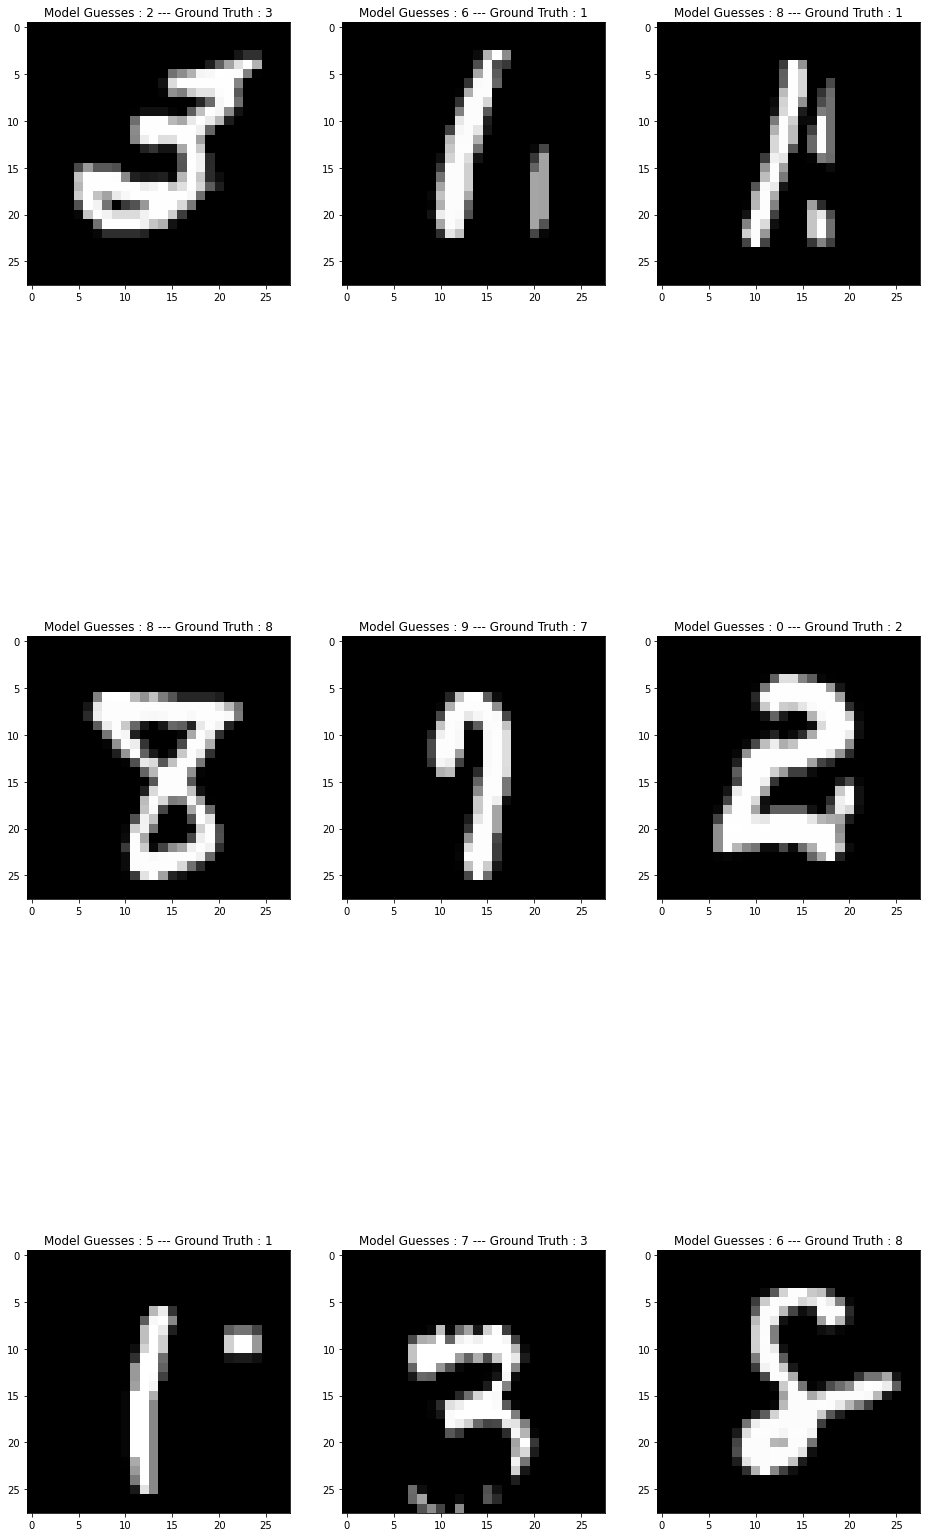

In [ ]:
visualize(really_wrong_list)

1/1 [==============================] - 0s 40ms/step


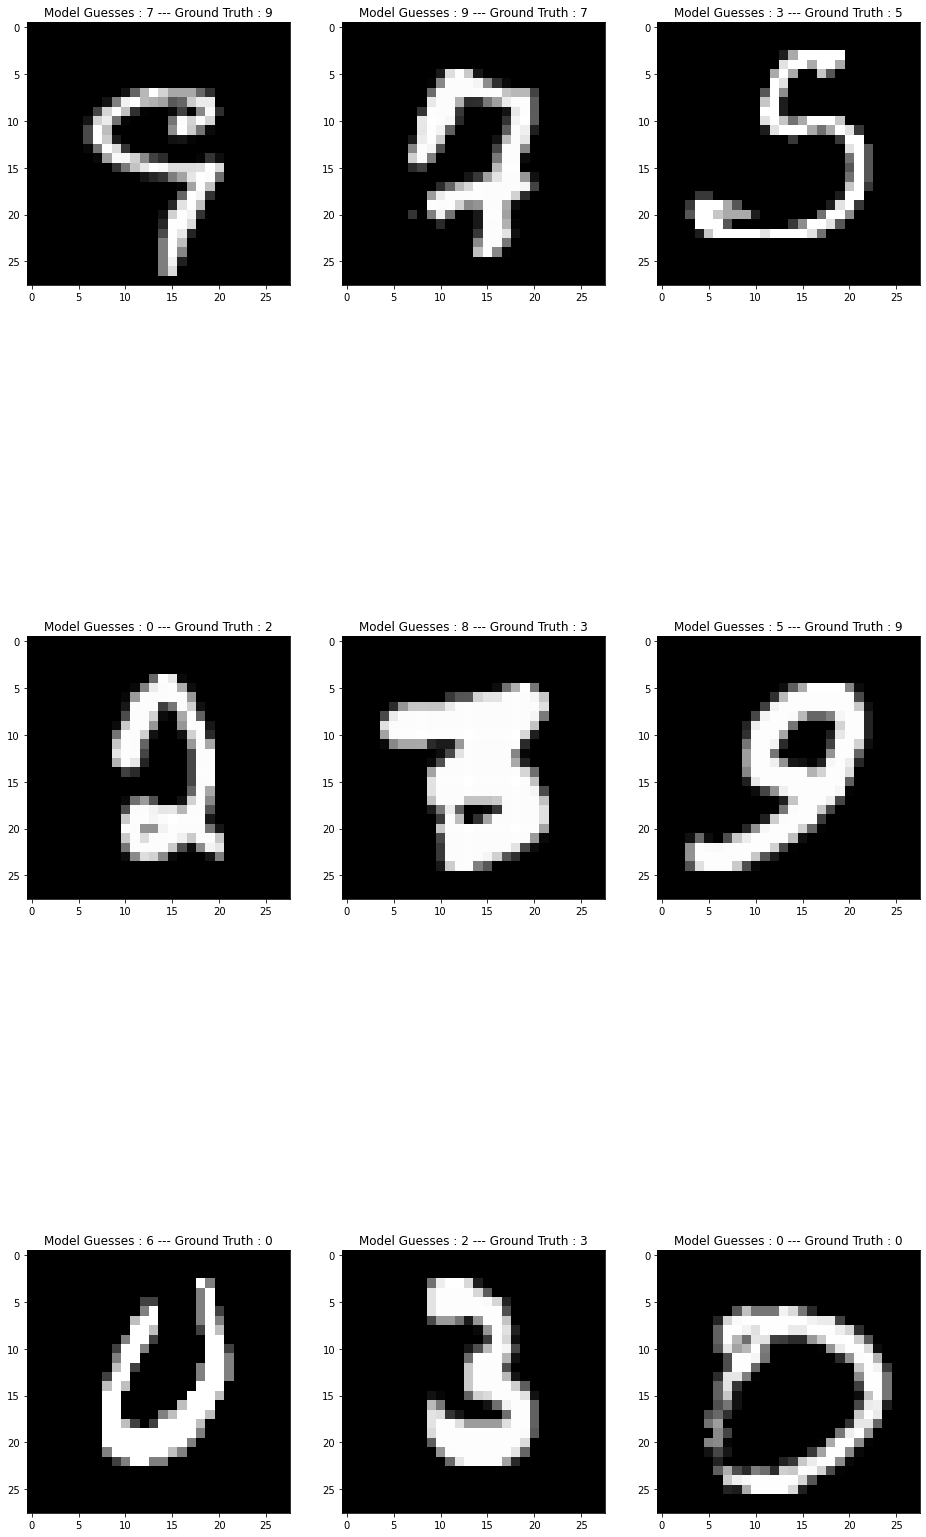

In [ ]:
visualize(wrong_list)

1/1 [==============================] - 0s 30ms/step


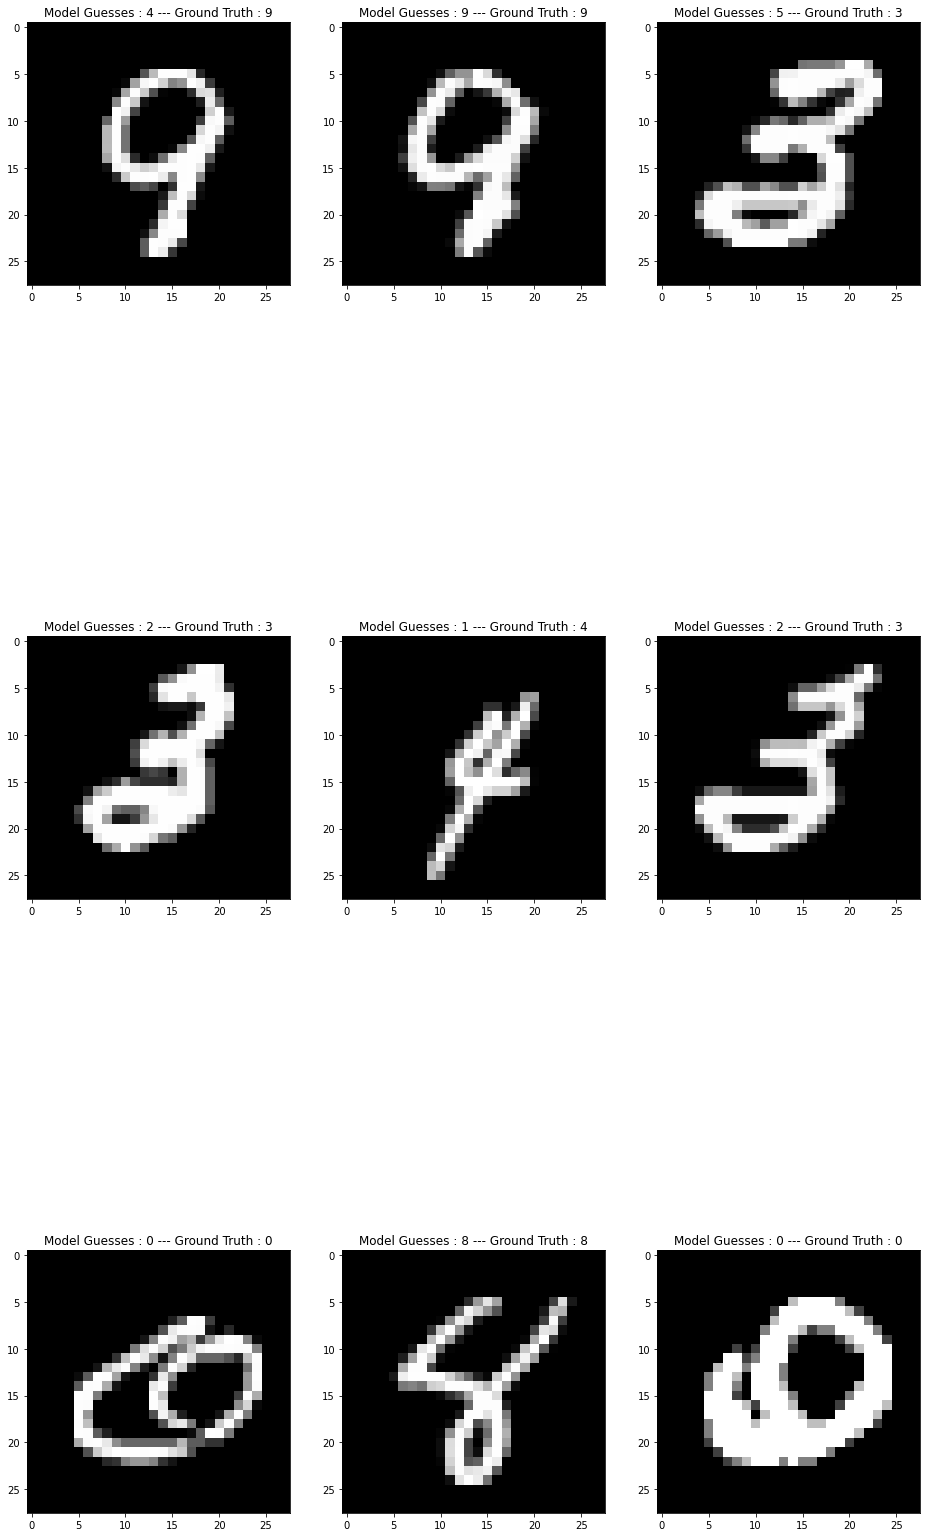

In [ ]:
visualize(right_but_barely_list)

1/1 [==============================] - 0s 114ms/step


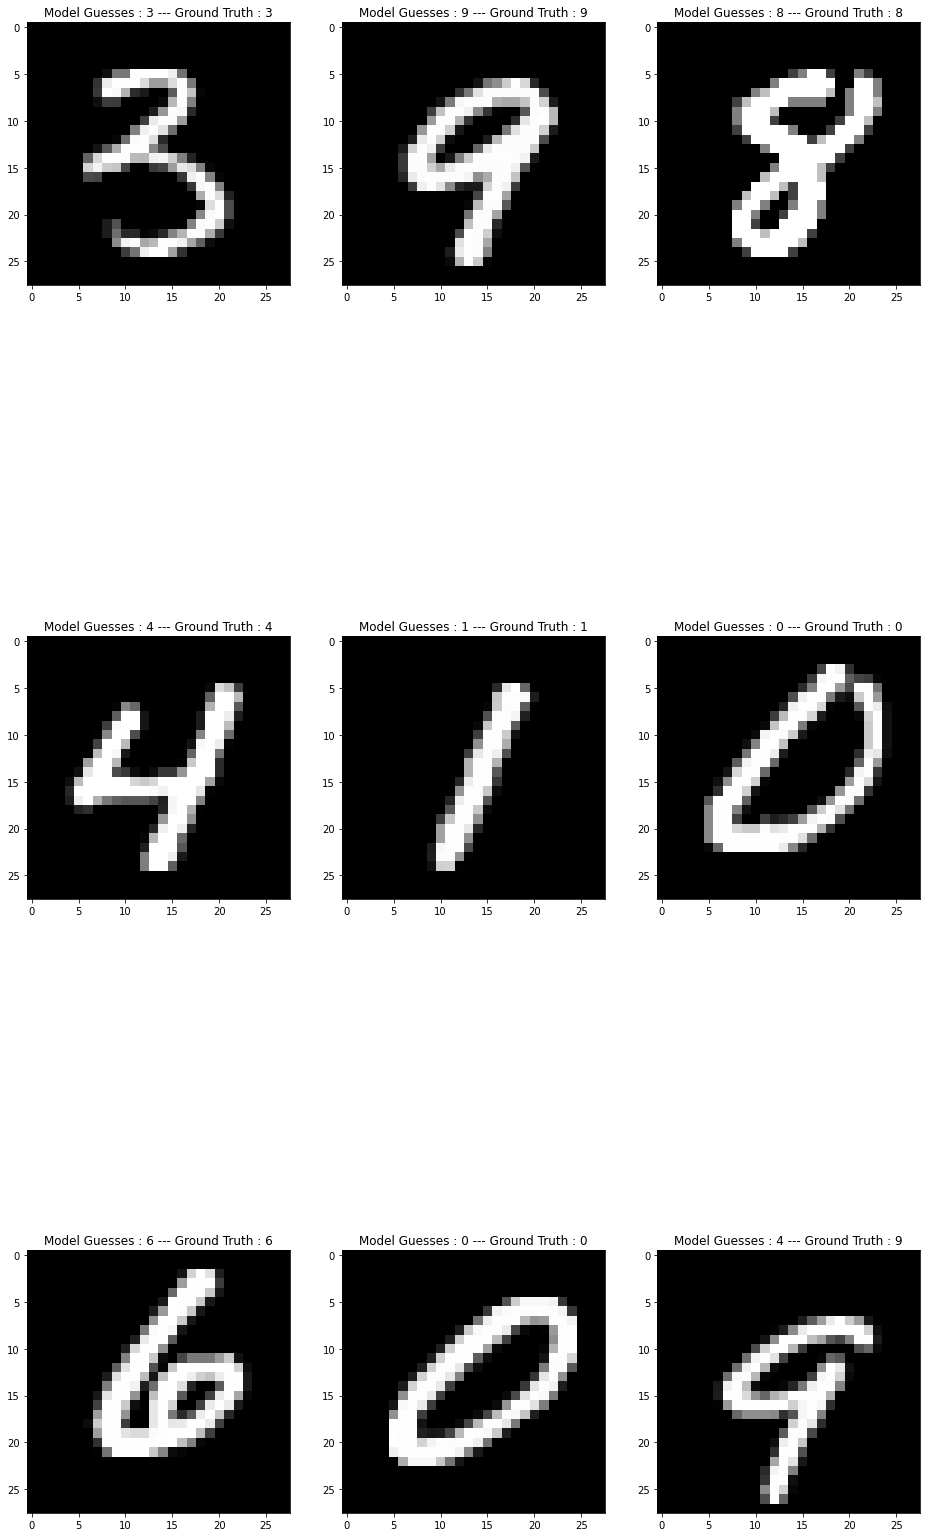

In [ ]:
visualize(correct_list)

In [ ]:
# Thrid model

model_3 = keras.Sequential()
model_3.add(SimpleRNN(64, input_shape=(None, 28)))
model_3.add(BatchNormalization())
model_3.add(Dense(10))
model_3.add(Activation('softmax'))

model_3_opt = optimizers.SGD()

model_3_loss = losses.categorical_crossentropy

model_3_metrics = [metrics.categorical_accuracy]

model_3.compile(optimizer=model_3_opt,
              loss=model_3_loss,
              metrics=model_3_metrics)

In [ ]:
print(model_3.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 64)                5952      
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 6,858
Trainable params: 6,730
Non-trainable params: 128
_________________________________________________________________
None


In [ ]:
history_3 = model_3.fit(x_train,
                y_train,
                validation_data = (x_val, y_val),
                batch_size=128,
                epochs=40)

Epoch 1/40
469/469 [==============================] - 11s 19ms/step - loss: 0.9202 - categorical_accuracy: 0.7042 - val_loss: 0.7151 - val_categorical_accuracy: 0.7698
Epoch 2/40
469/469 [==============================] - 11s 23ms/step - loss: 0.4454 - categorical_accuracy: 0.8676 - val_loss: 0.4388 - val_categorical_accuracy: 0.8676
Epoch 3/40
469/469 [==============================] - 16s 34ms/step - loss: 0.3281 - categorical_accuracy: 0.9015 - val_loss: 0.3545 - val_categorical_accuracy: 0.8930
Epoch 4/40
469/469 [==============================] - 10s 21ms/step - loss: 0.2724 - categorical_accuracy: 0.9188 - val_loss: 0.3130 - val_categorical_accuracy: 0.9048
Epoch 5/40
469/469 [==============================] - 10s 21ms/step - loss: 0.2375 - categorical_accuracy: 0.9290 - val_loss: 0.3200 - val_categorical_accuracy: 0.9034
Epoch 6/40
469/469 [==============================] - 8s 18ms/step - loss: 0.2108 - categorical_accuracy: 0.9373 - val_loss: 0.2739 - val_categorical_accuracy: 

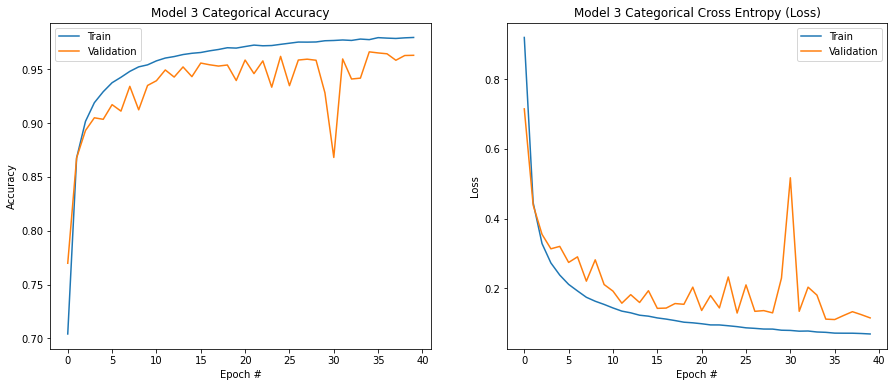

In [ ]:
plot_model_curves(history_3,'Model 3')

In [ ]:
score = model_3.evaluate(x_test, y_test, batch_size=128)
print("\n----------------------------------------------\n\nAccuracy On Test Data is : {}".format(score[1]))
print("Loss On Test Data is : {}".format(score[0]))

40/40 [==============================] - 0s 6ms/step - loss: 0.0592 - categorical_accuracy: 0.9826

----------------------------------------------

Accuracy On Test Data is : 0.9825999736785889
Loss On Test Data is : 0.05918525531888008
